### REAL DATA - Interpolate small subset

In [1]:
using Dierckx
using Plots
using PyCall
using Images
using Statistics

In [2]:
rasterio = pyimport("rasterio");
file = open("dem_path.txt")
filename = readlines(file)[1]
dataset = rasterio.open(filename);

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [ ]:
### line, sample, height = dem2sali(dem_path::String, s1_ann;view)
file = open(dem_path)
filename = readlines(file)[1]
dem_annotations = rasterio.open(filename);

lat_interval = (8.247465, 8.367465000000001)
lon_interval = (56.54182099999999, 56.581821)

# add padding
lat_padding = (maximum(lat_interval) - minimum(lat_interval))/100 * 15 # in degrees
lon_padding = (maximum(lon_interval) - minimum(lon_interval))/100 * 30 # in degrees

# find corners of subset in row, column, and add padding
(max_row, min_col) = dataset.index(lat_interval[1] - lat_padding, lon_interval[1] - lon_padding)
(min_row, max_col) = dataset.index(lat_interval[2] + lat_padding, lon_interval[2] + lon_padding);

In [3]:
# skal ikke med i funktion
DEM = dataset.read(1);

In [4]:
println(keys(dataset))

Symbol[:__class__, :__delattr__, :__dict__, :__dir__, :__doc__, :__enter__, :__eq__, :__exit__, :__format__, :__ge__, :__getattribute__, :__gt__, :__hash__, :__init__, :__init_subclass__, :__le__, :__lt__, :__module__, :__ne__, :__new__, :__pyx_vtable__, :__reduce__, :__reduce_ex__, :__repr__, :__setattr__, :__setstate__, :__sizeof__, :__str__, :__subclasshook__, :__weakref__, :_block_shapes, :_closed, :_count, :_crs, :_crs_wkt, :_descriptions, :_dtypes, :_env, :_gcps, :_get_crs, :_handle_crswkt, :_has_band, :_mask_flags, :_nodatavals, :_offsets, :_read, :_scales, :_set_all_descriptions, :_set_all_offsets, :_set_all_scales, :_set_all_units, :_set_attrs_from_dataset_handle, :_set_crs, :_set_gcps, :_set_nodatavals, :_transform, :_units, :block_shapes, :block_size, :block_window, :block_windows, :bounds, :checksum, :close, :closed, :colorinterp, :colormap, :compression, :count, :crs, :dataset_mask, :descriptions, :driver, :dtypes, :files, :gcps, :get_gcps, :get_nodatavals, :get_tag_item, 

In [69]:
dataset.index(10, 60)

(0, 5999)

In [78]:
print("max(lon, lat)", ": ", dataset.index(8.367465000000001, 56.581821))

max(lat, lon): (4101, 4040)

In [79]:
print("min(lat, lon)", ": ", dataset.index(8.247465, 56.54182099999999))

min(lat, lon): (4149, 3896)

In [114]:
(min_lon_index, min_lat_index) = dataset.index(8.247465, 56.54182099999999)
(max_lon_index, max_lat_index) = dataset.index(8.367465000000001, 56.581821);

In [157]:
lat_interval = (8.247465, 8.367465000000001)
lon_interval = (56.54182099999999, 56.581821)

# add padding
lat_padding = (maximum(lat_interval) - minimum(lat_interval))/100 * 15 # in degrees
lon_padding = (maximum(lon_interval) - minimum(lon_interval))/100 * 30 # in degrees

# find corners of subset in row, column, and add padding
(max_row, min_col) = dataset.index(lat_interval[1] - lat_padding, lon_interval[1] - lon_padding)
(min_row, max_col) = dataset.index(lat_interval[2] + lat_padding, lon_interval[2] + lon_padding);

In [154]:
print(min_row, ", ", max_row, "\\")
print(min_col, ", ", max_col)

4053, 4197\3824, 4112

In [158]:
padding = 200
row_interval = (min_row, max_row)
col_interval = (min_col, max_col)
dem = dataset.read(1, window=(row_interval, col_interval))
dem_image = copy(dem) .+ 39;
dem_image[dem_image .== (-32768+ 39)] .= 10;

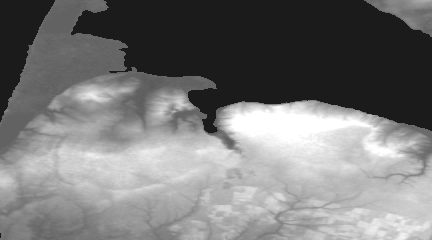

In [159]:
dem_image = abs.(dem_image)
dem_image = dem_image./quantile(reshape(dem_image, :), 0.98);
Gray.(dem_image)

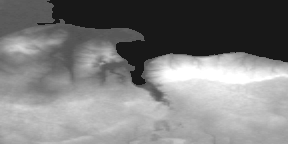

In [156]:
dem_image = abs.(dem_image)
dem_image = dem_image./quantile(reshape(dem_image, :), 0.98);
Gray.(dem_image)

In [6]:
transform = dataset.get_transform()

6-element Array{Float64,1}:
  5.0                  
  0.0008333333333333334
  0.0                  
 60.0                  
  0.0                  
 -0.0008333333333333334

### Calc Lat long for DEM

In [9]:
rows = collect(1:dataset.height);
columns = collect(1:dataset.width);
lon = transform[1] .+rows .*transform[2];
lat  = transform[4] .+columns .*transform[6];

In [18]:
print(lat[1:3], lon[1:3])

[59.9992, 59.9983, 59.9975][5.00083, 5.00167, 5.0025]

### Crop DEM to coords
found some place in annotation

In [60]:
# crop around corner reflector
lat_center = (56 + 33/60 + 42.5556/(60*60))
lon_center = (8 + 18/60 + 26.874/(60*60))

lat_max = lat_center + 0.02 # 5.666818777336966e+01
lon_max = lon_center + 0.06 # 8.692126035601964e+00;
lat_min = lat_center - 0.02 # 5.514243624845066e+01
lon_min = lon_center - 0.06 # 6.863612098279713e+00;

In [63]:
index1 = lat_min .<lat.< lat_max;
index2 = lon_min .<lon.< lon_max;

In [67]:

print(lat_min, ", ", lon_min)

56.54182099999999, 8.247465

In [62]:
test = DEM[index1,index2];
lat = lat[index1]
lon = lon[index2];

UndefVarError: UndefVarError: index1 not defined

In [78]:
### TO elipsoidal 

test = test .+ 39;

### Remove NaN values

In [79]:
test[test .== (-32768+ 39)] .= 10;

### Show DEM

In [80]:
Show_img = abs.(copy(test))
Show_img = Show_img./quantile(reshape(Show_img, :), 0.98);

┌ Info: Recompiling stale cache file /Users/eyu/.julia/compiled/v1.1/QuartzImageIO/n8vDP.ji for QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1184


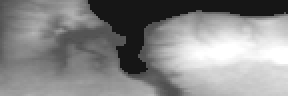

In [81]:
Gray.(Show_img)

### Create 2d array with points

In [82]:
lat_matrix = Array{Float64}(undef, length(lat), length(lon))
lon_matrix = Array{Float64}(undef,length(lat), length(lon))

for i = 1:length(lat)
    for j = 1:length(lon)
        lat_matrix[i,j] = lat[i]
        lon_matrix[i,j] = lon[j]
    end
end   

In [83]:
llh = hcat(reshape(lat_matrix,:),reshape(lon_matrix,:),reshape(test,:));

### Transform to sat coordinates

In [84]:
include("llh2sali.jl")
include("load_pod.jl")
include("load_s1slc_ann.jl");

In [85]:
file = open("ann_path.txt")
path = readlines(file)
sar_parameters = load_s1slc_ann(path[1])

file = open("POD_path.txt")
path = readlines(file)
osv, t_sv = load_pod(path[1],sar_parameters["t_0"]);

In [86]:
sali = llh2sali(llh, osv, t_sv, sar_parameters);

### Interpolate

In [87]:
sali_subset = sali;
z = reshape(test,:);

In [88]:
pyplot()

Plots.PyPlotBackend()

In [89]:
z[60 .<z] .= 60 ;

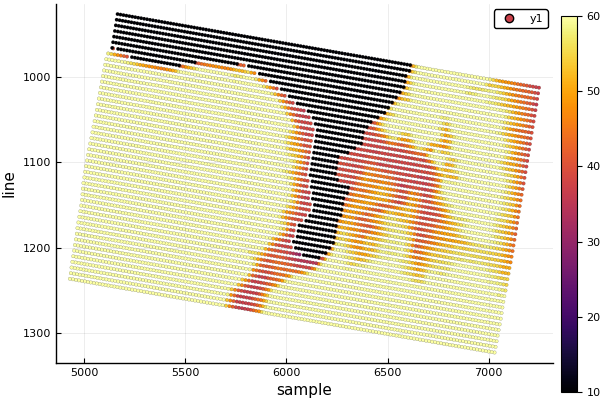

In [90]:
steps= 1
scatter(sali_subset[1:steps:end,2],sali_subset[1:steps:end,1],
    zcolor=z[1:steps:end],
    yaxis = ("line", :flip),xaxis = ("sample"),
    markersize=2.5, markerstrokewidth = 0.1)

In [ ]:
### REAL DATA - Interpolate small subset

rasterio = pyimport("rasterio");
file = open("dem_path.txt")
filename = readlines(file)[1]
dataset = rasterio.open(filename);

DEM = dataset.read(1);

transform = dataset.get_transform()

### Calc Lat long for DEM

rows = collect(1:dataset.height);
columns = collect(1:dataset.width);
lon = transform[1] .+rows .*transform[2];
lat  = transform[4] .+columns .*transform[6];

### Crop DEM to coords
found some place in annotation

# crop around corner reflector
lat_center = (56 + 33/60 + 42.5556/(60*60))
lon_center = (8 + 18/60 + 26.874/(60*60))

lat_max = lat_center + 0.02 # 5.666818777336966e+01
lon_max = lon_center + 0.06 # 8.692126035601964e+00;
lat_min = lat_center - 0.02 # 5.514243624845066e+01
lon_min = lon_center - 0.06# 6.863612098279713e+00;

index1 = lat_min .<lat.< lat_max;
index2 = lon_min .<lon.< lon_max;

test = DEM[index1,index2];
lat = lat[index1]
lon = lon[index2];

### TO elipsoidal 

test = test .+ 39;

### Remove NaN values

test[test .== (-32768+ 39)] .= 10;

### Show DEM

Show_img = abs.(copy(test))
Show_img = Show_img./quantile(reshape(Show_img, :), 0.98);

Gray.(Show_img)

### Create 2d array with points

lat_matrix = Array{Float64}(undef, length(lat), length(lon))
lon_matrix = Array{Float64}(undef,length(lat), length(lon))

for i = 1:length(lat)
    for j = 1:length(lon)
        lat_matrix[i,j] = lat[i]
        lon_matrix[i,j] = lon[j]
    end
end   

llh = hcat(reshape(lat_matrix,:),reshape(lon_matrix,:),reshape(test,:));

### Transform to sat coordinates

include("llh2sali.jl")
include("load_pod.jl")
include("load_s1slc_ann.jl");

file = open("ann_path.txt")
path = readlines(file)
sar_parameters = load_s1slc_ann(path[1])

file = open("POD_path.txt")
path = readlines(file)
osv, t_sv = load_pod(path[1],sar_parameters["t_0"]);

sali = llh2sali(llh, osv, t_sv, sar_parameters);

### Interpolate

sali_subset = sali;
z = reshape(test,:);

pyplot()

z[60 .<z] .= 60 ;

steps= 1
scatter(sali_subset[1:steps:end,2],sali_subset[1:steps:end,1],
    zcolor=z[1:steps:end],
    yaxis = ("line", :flip),xaxis = ("sample"),
    markersize=2.5, markerstrokewidth = 0.1)